In [1]:
from gm_age_relation import *

In [2]:
# initialze the GALAH training

GM = GM_Age_GALAH('../500_pc_KM_rv_cross_match/')

/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:240: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['zgal_gaia'][cat['zgal_gaia'] < -1000] = np.nan

/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['UVel_gaia'][cat['UVel_gaia'] < -1000] = np.nan

/Volumes/Medan_Data/gaia_RV_cross_match/gm_age_relation.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat

100%|██████████| 100/100 [00:00<00:00, 2019.64it/s]


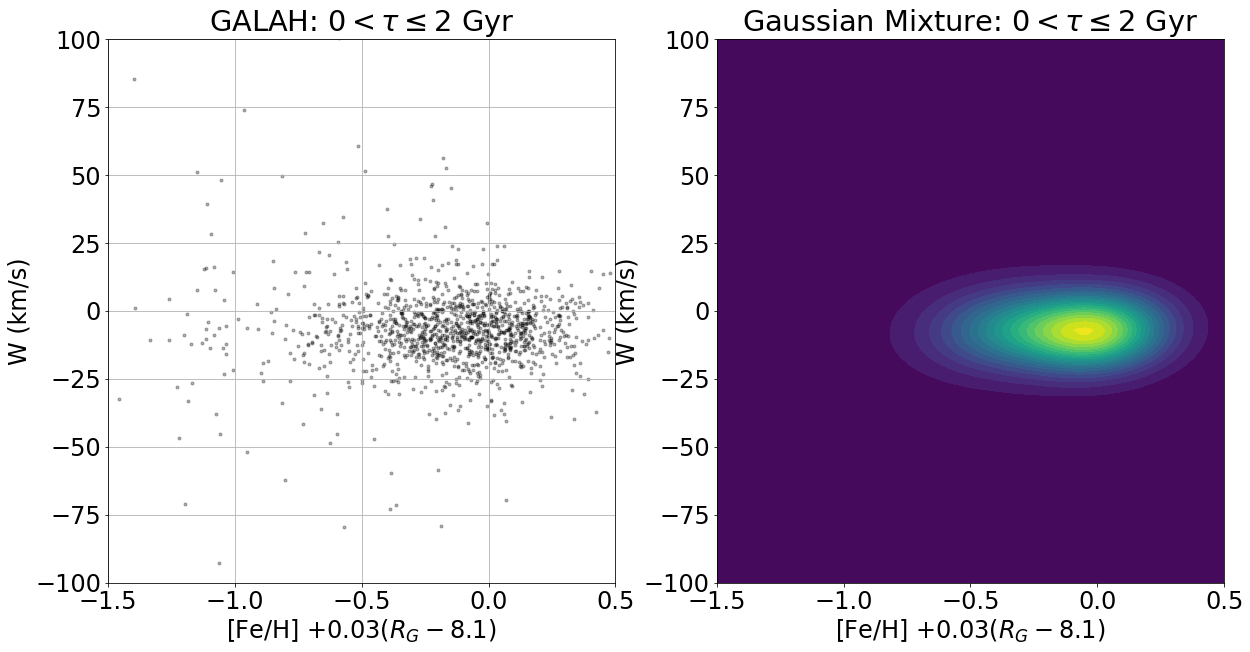

100%|██████████| 100/100 [00:00<00:00, 1365.82it/s]


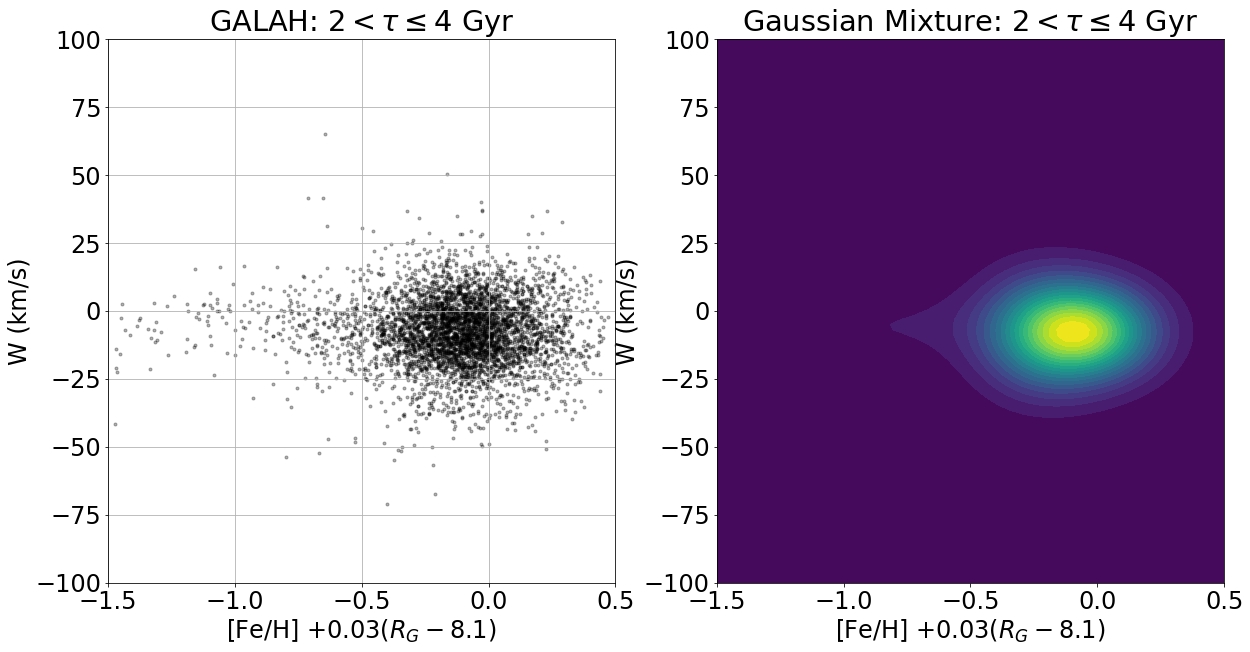

100%|██████████| 100/100 [00:00<00:00, 1837.92it/s]


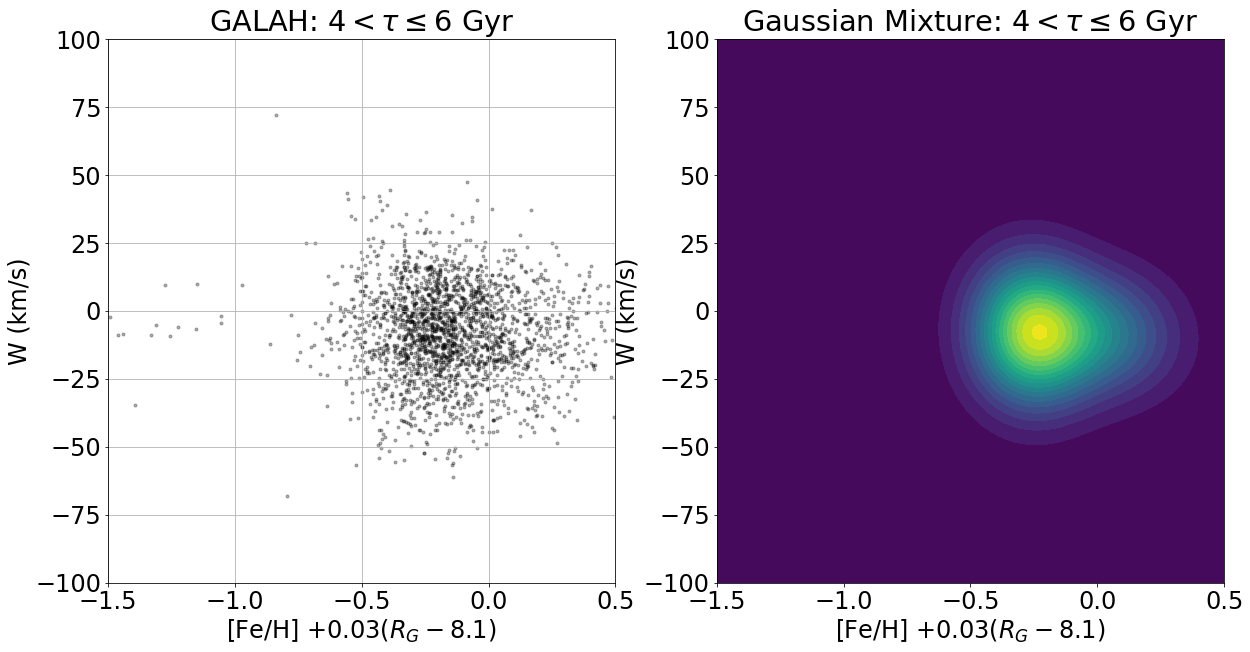

100%|██████████| 100/100 [00:00<00:00, 2198.49it/s]


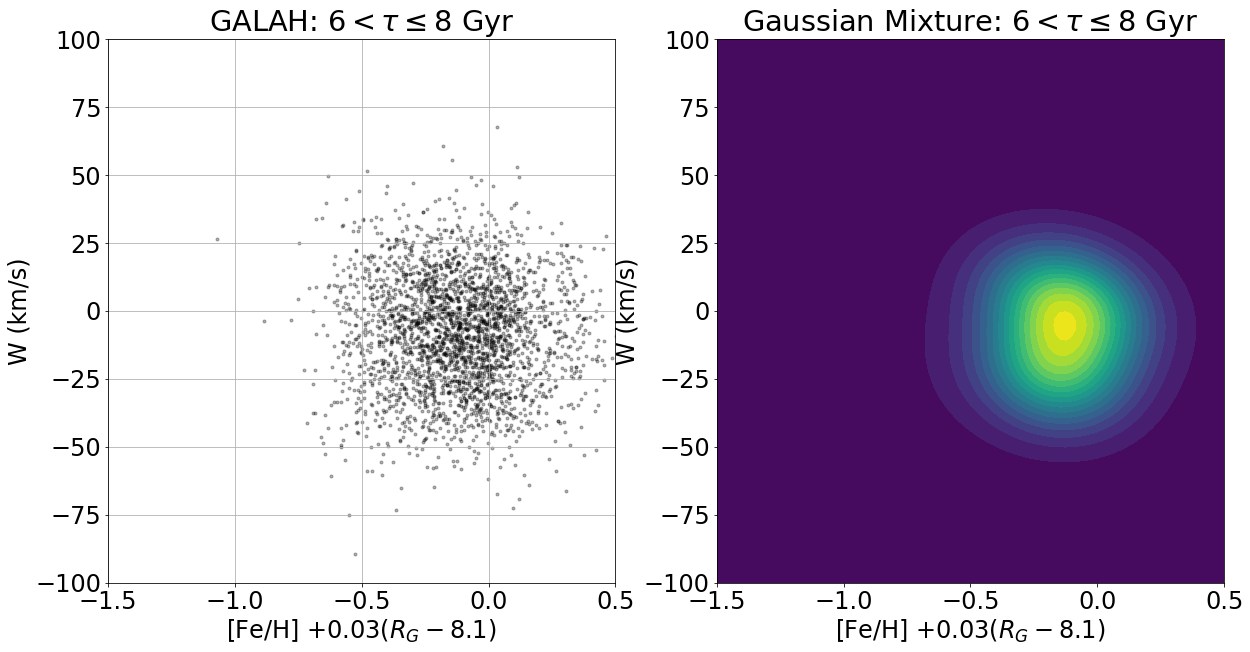

100%|██████████| 100/100 [00:00<00:00, 1312.16it/s]


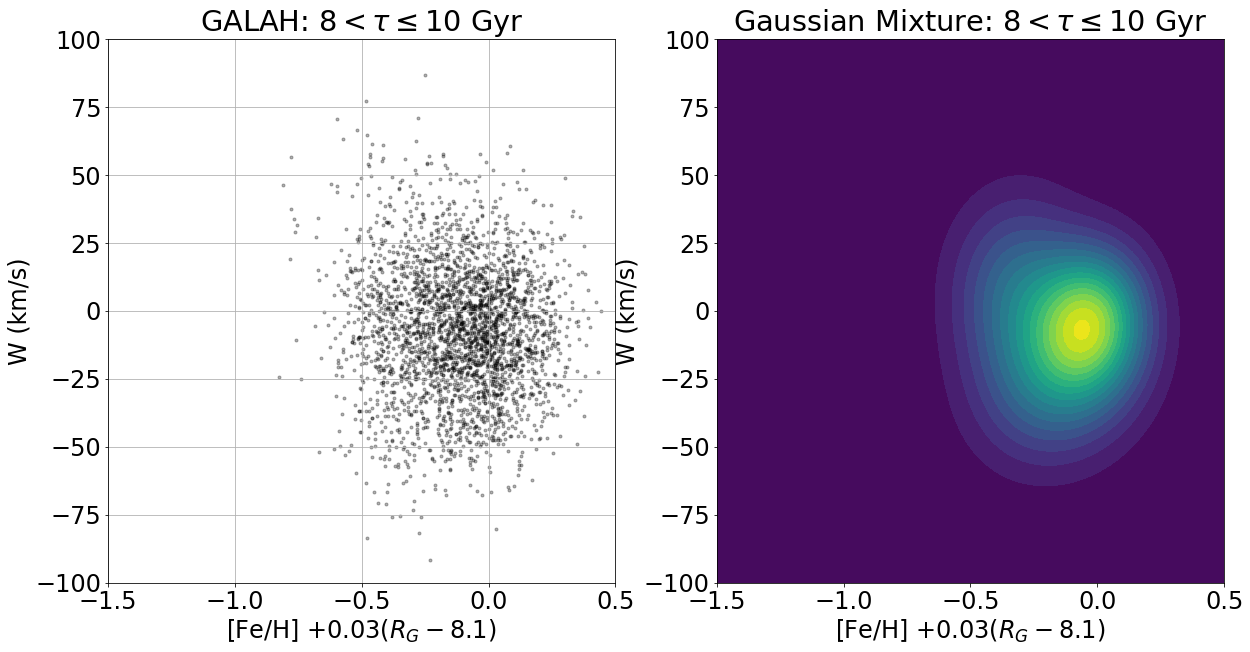

100%|██████████| 100/100 [00:00<00:00, 2651.18it/s]


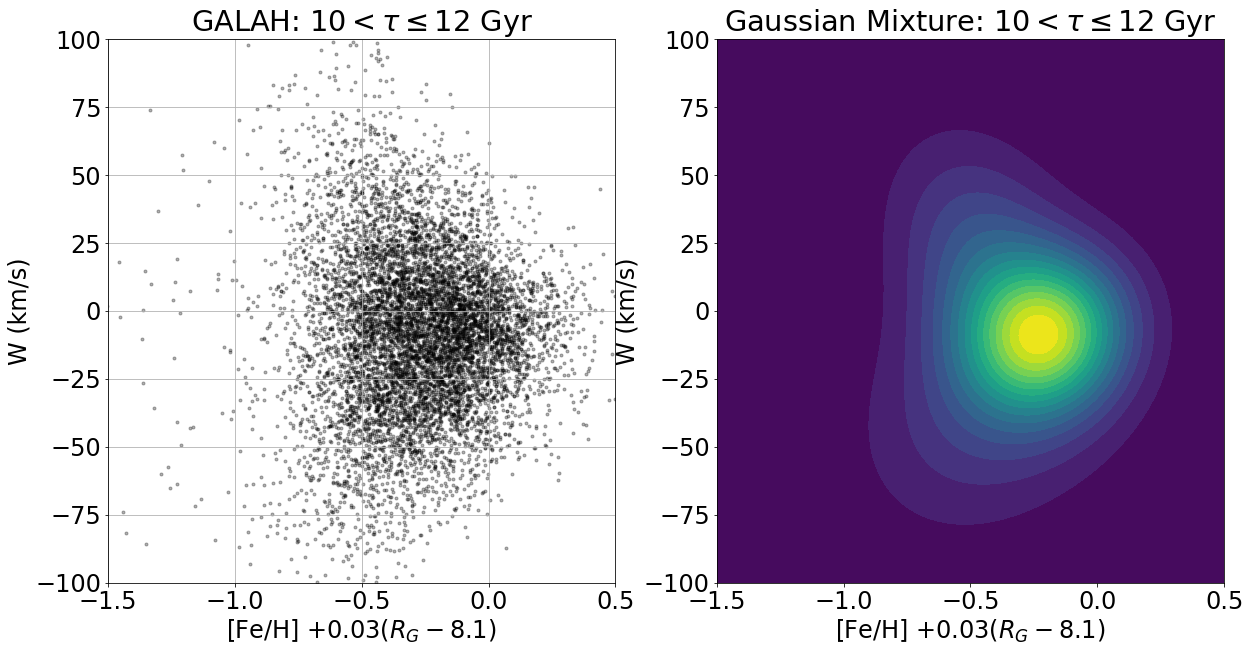

100%|██████████| 100/100 [00:00<00:00, 2749.14it/s]


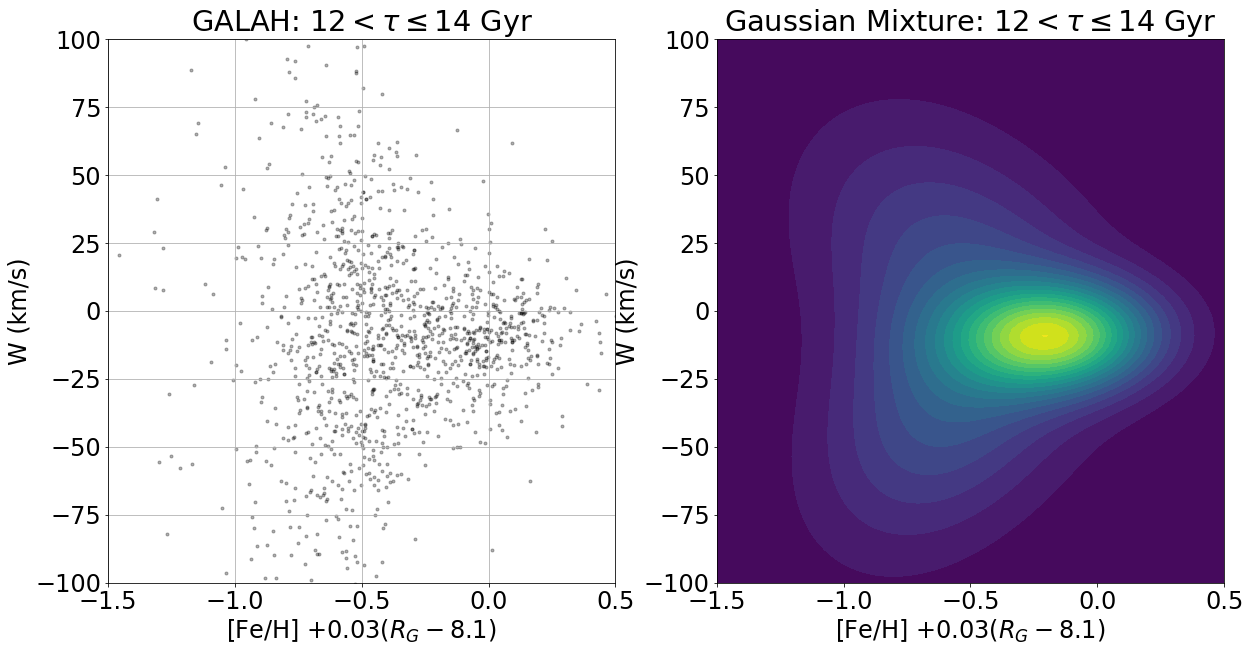

In [3]:
# get the GM models from GALAH
GM.find_GMMs(plot_dir='paper_plots')

In [4]:
KM = KM_metals(metals_file='gaia_DR3_photo_metallicities.txt',
               gaia_file='gaia_file/gaia_K_dwarf_RV_DR3-result.csv')

/Users/imedan/anaconda3/lib/python3.6/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)

/Users/imedan/anaconda3/lib/python3.6/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)



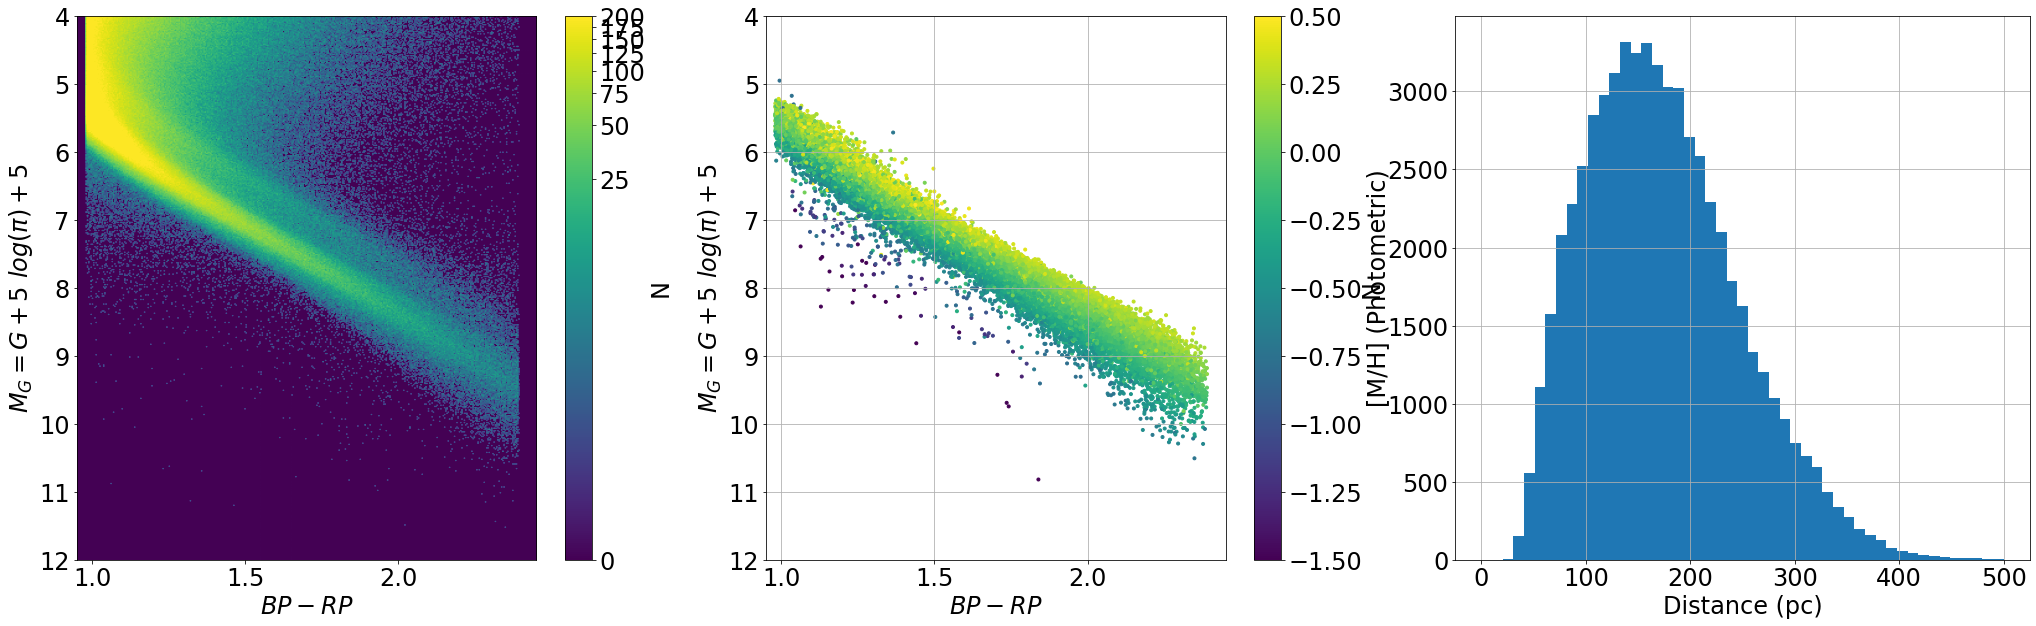

In [9]:
# make figure 1 in the table
import mpl_scatter_density
import numpy as np

from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(vmin=0., vmax=200, stretch=LogStretch())

gaia = pd.read_csv('gaia_file/gaia_K_dwarf_RV_DR3-result.csv',
                    usecols=[0, 2, 4, 5, 7, 9, 11, 12, 13, 14, 15],
                    names=['RA', 'DEC', 'ID', 'plx', 'pmra',
                           'pmde', 'G', 'BP', 'RP', 'rv', 'rv_err'],
                    skiprows=1)

fig = plt.figure(figsize=(35, 10))
ax1 = fig.add_subplot(1, 3, 1, projection='scatter_density')
dens = ax1.scatter_density(gaia['BP'] - gaia['RP'],
                           gaia['G'] + 5 * np.log10(1e-3 * gaia['plx']) + 5,
                           norm=norm)
plt.colorbar(dens, ax=ax1, label='N')
ax1.set_xlabel(r'$BP-RP$')
ax1.set_ylabel(r'$M_G = G + 5 \ log(\pi) + 5$')
ax1.set_xlim((0.95, 2.45))
ax1.set_ylim((4, 12))
ax1.invert_yaxis()

ax2 = fig.add_subplot(1, 3, 2)
dens = ax2.scatter(KM.KM_metals['BP'] - KM.KM_metals['RP'],
                    KM.KM_metals['G'] + 5 * np.log10(1e-3 * KM.KM_metals['plx']) + 5,
                    marker='.', c=KM.KM_metals['M_H'], vmin=-1.5, vmax=0.5)
plt.colorbar(dens, ax=ax2, label='[M/H] (Photometric)')
ax2.set_xlabel(r'$BP-RP$')
ax2.set_ylabel(r'$M_G = G + 5 \ log(\pi) + 5$')
ax2.grid()
ax2.set_xlim((0.95, 2.45))
ax2.set_ylim((4, 12))
ax2.invert_yaxis()

ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(1000 / KM.KM_metals['plx'], bins=np.linspace(0, 500, 50))
ax3.grid()
ax3.set_xlabel('Distance (pc)')
ax3.set_ylabel('N')

plt.savefig('paper_plots/photo_metallciities_gaia_hr_ext_corr.png', dpi=100,
            bbox_inches='tight')

plt.show()

../500_pc_KM_rv_cross_match/gm_age_relation.py:700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.KM_metals['group'][ev] = n

../500_pc_KM_rv_cross_match/gm_age_relation.py:741: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.stream_dfs['%d' % i]['group_pca'][ev] = i



IndexError: Boolean index has wrong length: 59729 instead of 11987

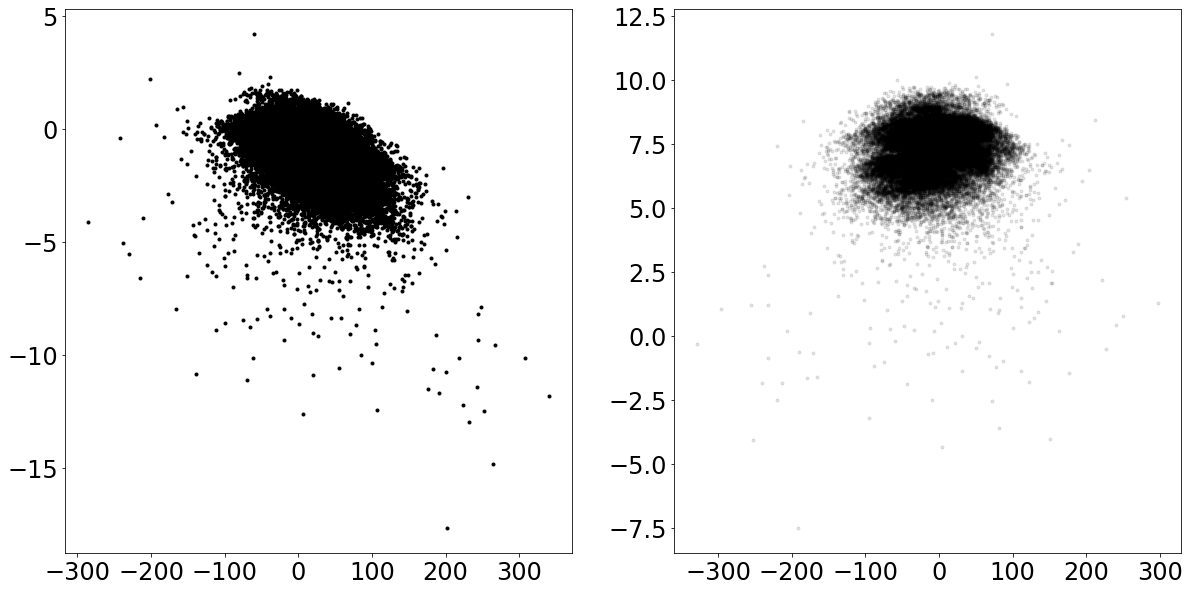

In [5]:
KM.assign_kinematic_groups()